In [1]:
library(GGally)
library(dplyr)
library(ggplot2)
library(devtools)
library(ggbiplot)
library(Rtsne)


Attaching package: ‘dplyr’

The following object is masked from ‘package:GGally’:

    nasa

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: plyr
------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

Loading required package: scales
Loading required package: grid


In [2]:
set.seed(1)

In [3]:
df <- read.csv("../data/middle/sp4.csv", stringsAsFactors=FALSE)

In [4]:
df$flag[df$flag == "RedA"] <- "Red"
df$flag[df$flag == "RedB"] <- "Red"
df$flag[df$flag == "BlueA"] <- "Blue"
df$flag[df$flag == "BlueB"] <- "Blue"
df$flag <- as.factor(df$flag)

In [5]:
colnames(df)

[1] "Time"              "Longitude"         "Latitude"         
 [4] "Speed"             "Brake"             "Accel"            
 [7] "Engine"            "AheadDistance"     "Curve150"         
[10] "Curve100"          "Curve"             "SteeringAngle"    
[13] "BranchFlag"        "DistTollgate"      "RoadType"         
[16] "GreenLamp"         "RedLamp"           "RightLamp"        
[19] "UpLamp"            "LeftLamp"          "StopSign"         
[22] "Limit30Sign"       "Limit50Sign"       "BrakeCar"         
[25] "LeftCar"           "ManBicycleCount"   "ManBicycle"       
[28] "DistManBicycle"    "Pitch"             "DistSignal"       
[31] "PathType"          "LaneCount"         "AccelerationSpeed"
[34] "Jerk"              "AverageVelocity"   "MaxSpeed"         
[37] "MinSpeed"          "CurveAverage"      "TimeHeadway"      
[40] "TimeToCollision"   "RiskFactor"        "flag"

In [6]:
valuables <- c("RoadType","CurveAverage","Speed","MaxSpeed","RiskFactor","Curve","DistSignal","Pitch","AheadDistance","AverageVelocity","TimeToCollision","AccelerationSpeed","LaneCount","Engine","PathType","SteeringAngle")

In [7]:
roads <- c("CurveAverage", "Curve", "DistSignal", "Pitch", "LaneCount")

In [8]:
speeds <- c("Speed", "MaxSpeed", "RiskFactor", "TimeToCollision", "TimeHeadway")

In [9]:
my_dens <- function(data, mapping, ...) {
  ggplot(data = data, mapping=mapping) +
    geom_density(..., alpha = 0.7) 
}

In [10]:
pm <- ggpairs(df, mapping = aes(color = flag), columns=speeds, diag = list(continuous = my_dens))

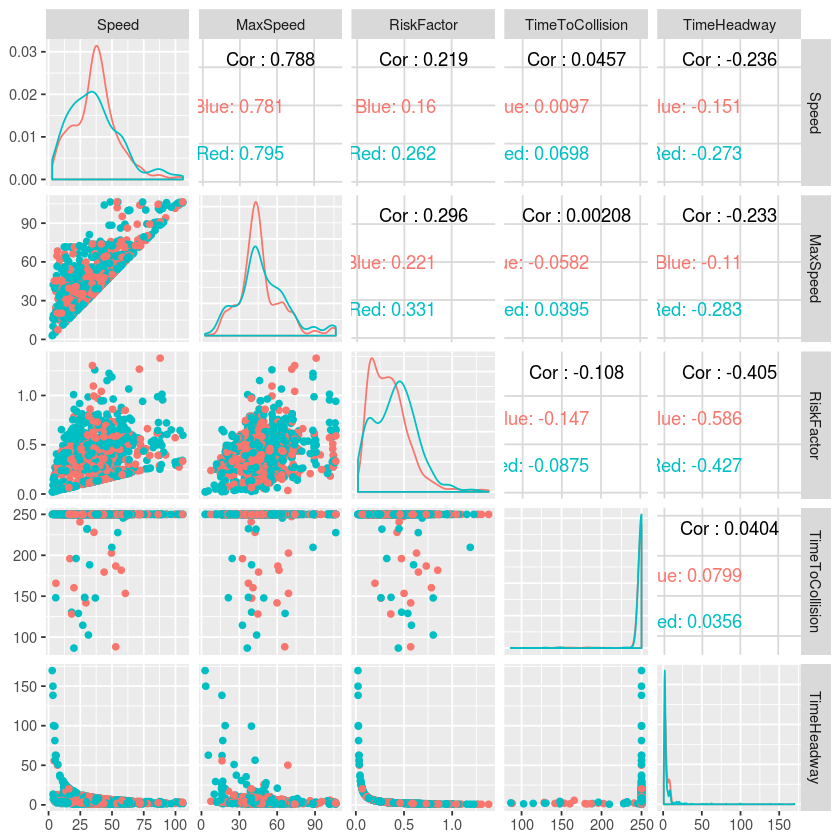

In [11]:
pm

In [12]:
pm <- ggpairs(df, mapping = aes(color = flag), columns=roads, diag = list(continuous = my_dens))

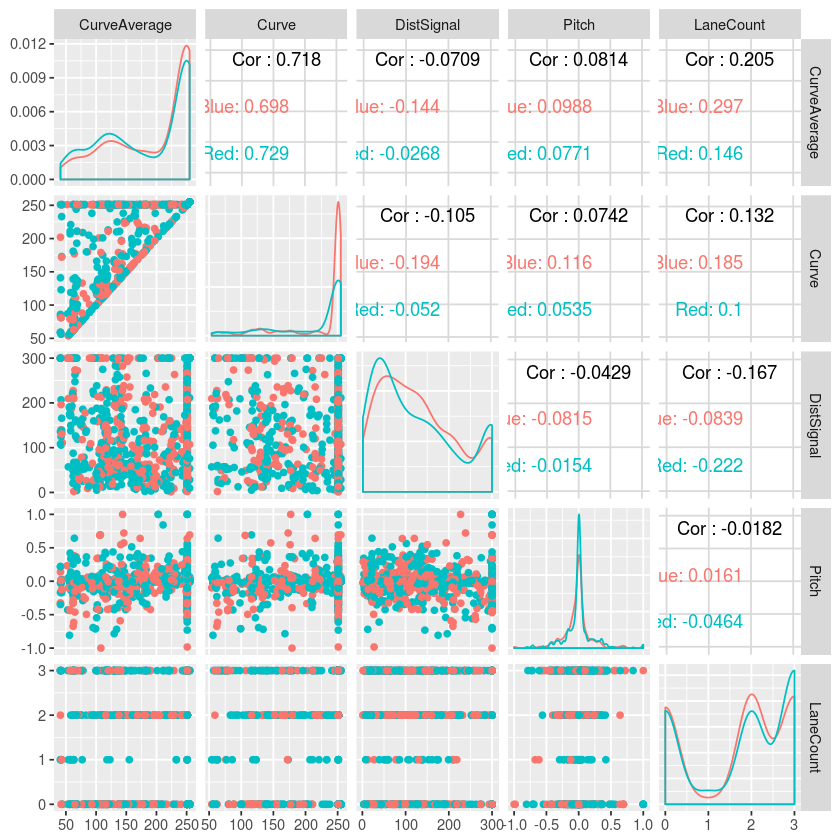

In [13]:
pm

In [14]:
colors = rainbow(length(unique(df$flag)))
names(colors) = unique(df$flag)

# t-SNE and PCA

In [15]:
set.seed(1)

Read the 1042 x 16 data matrix successfully!
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Normalizing input...
Building tree...
 - point 0 of 1042
Done in 0.09 seconds (sparsity = 0.114065)!
Learning embedding...
Iteration 50: error is 71.003323 (50 iterations in 0.25 seconds)
Iteration 100: error is 66.663713 (50 iterations in 0.26 seconds)
Iteration 150: error is 66.637851 (50 iterations in 0.24 seconds)
Iteration 200: error is 66.238375 (50 iterations in 0.26 seconds)
Iteration 250: error is 66.233788 (50 iterations in 0.23 seconds)
Iteration 300: error is 1.069639 (50 iterations in 0.23 seconds)
Iteration 350: error is 0.913404 (50 iterations in 0.21 seconds)
Iteration 400: error is 0.869605 (50 iterations in 0.22 seconds)
Iteration 450: error is 0.846931 (50 iterations in 0.23 seconds)
Iteration 500: error is 0.833703 (50 iterations in 0.21 seconds)
Iteration 550: error is 0.826671 (50 iterations in 0.20 seconds)
Iteration 600: er

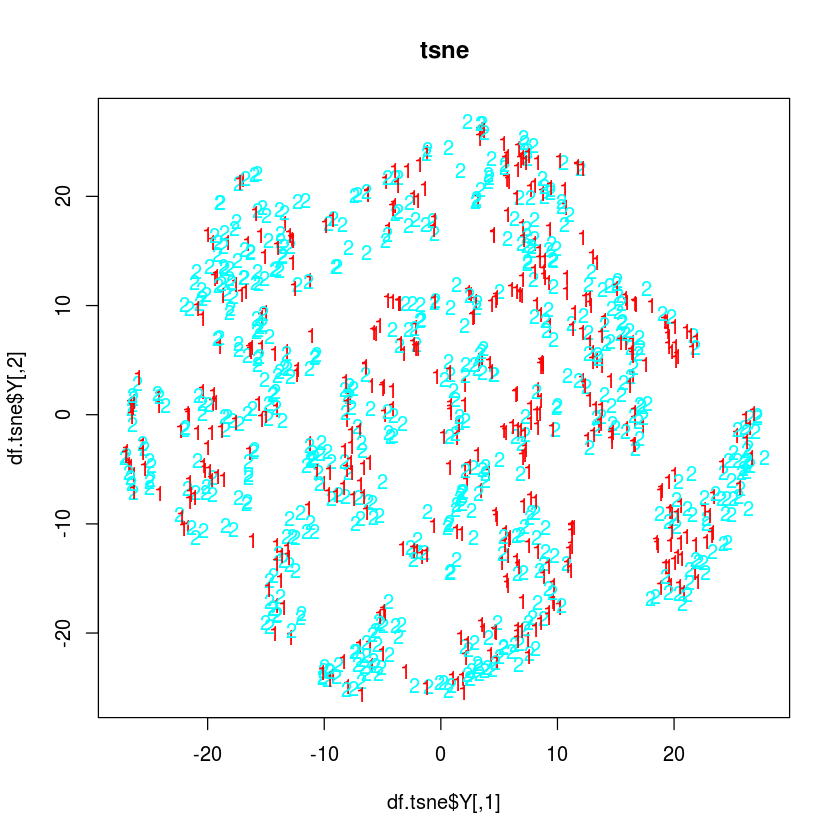

In [16]:
df.tsne = Rtsne(df[, valuables], check_duplicates = FALSE, verbose=TRUE) 
plot(df.tsne$Y, t='n', main="tsne")
text(df.tsne$Y, labels=as.integer(as.factor(df$flag)), col=colors[df$flag])

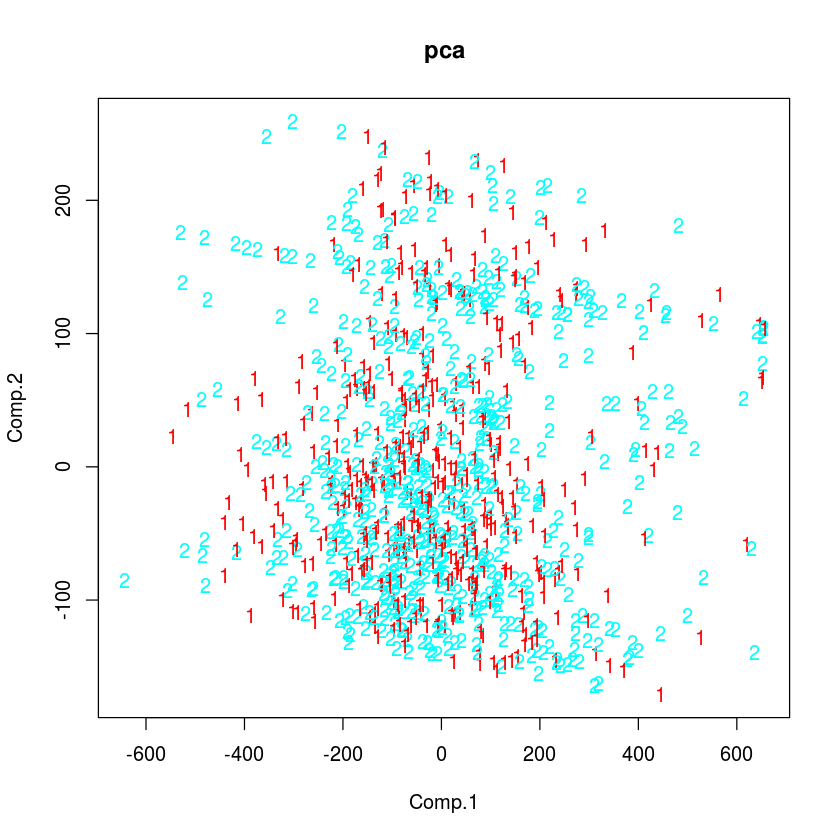

In [17]:
df.pca = princomp(df[, valuables])$scores[,1:2]
plot(df.pca, t='n', main="pca")
text(df.pca, labels=as.integer(as.factor(df$flag)),col=colors[df$flag])